# Fisher LDA projection of vowel data to 2d

Author:Srikar-Reddy-Jilugu(@always-newbie161)  
https://github.com/probml/pmtk3/blob/master/demos/fisherDiscrimVowelDemo.m

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import io, requests
from scipy.io import loadmat

url = "https://github.com/probml/probml-data/blob/main/data/vowelTrain.mat?raw=true"
r = requests.get(url, allow_redirects=True)
rawdata = io.BytesIO(r.content)

data = loadmat(rawdata)
X = data['Xtrain']
y = data['ytrain'].squeeze()

nsamples, ndims = X.shape
nclasses = np.unique(y).shape[0]

muC = np.zeros((nclasses, ndims))
for c in range(nclasses):
    muC[c, :] = X[np.where(y == (c + 1))[0], :].mean(axis=0)

K = 2

nsamples, ndims, nclasses

(528, 10, 11)

Text(0.5, 1.0, 'PCA projection of vowel data to 2d')

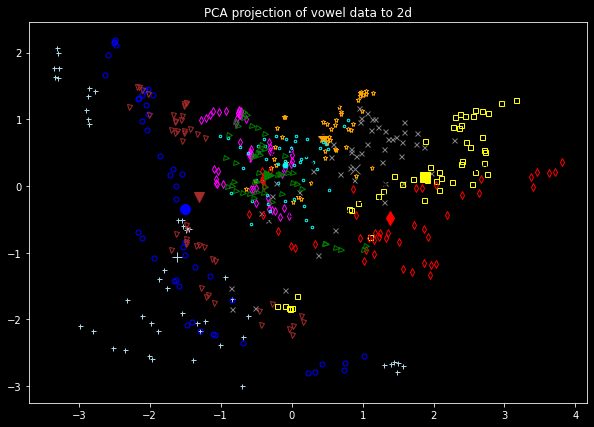

In [19]:
# PCA projection
from sklearn.decomposition import PCA
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X, y)
X_pca[:,1] *= -1 # make it look like the Hastie figure
muC2d_pca = pca.transform(muC)
muC2d_pca[:,1] *= -1

colors = ['lightblue', 'blue', 'brown', 'magenta', 'orange', 'cyan', 'gray', 'yellow', 'black', 'red', 'green']
symbols = "+ovd*.xs^d><ph"

_, ax = plt.subplots(figsize=(10,7))
for c in range(nclasses):
    ndx = np.where(y == (c + 1))
    ax.plot(X_pca[ndx, 0], X_pca[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none')
    ax.plot(muC2d_pca[c, 0], muC2d_pca[c, 1], symbols[c], color=colors[c], markersize=10)
ax.set_title('PCA projection of vowel data to 2d')


Text(0.5, 1.0, 'FLDA projection of vowel data to 2d')

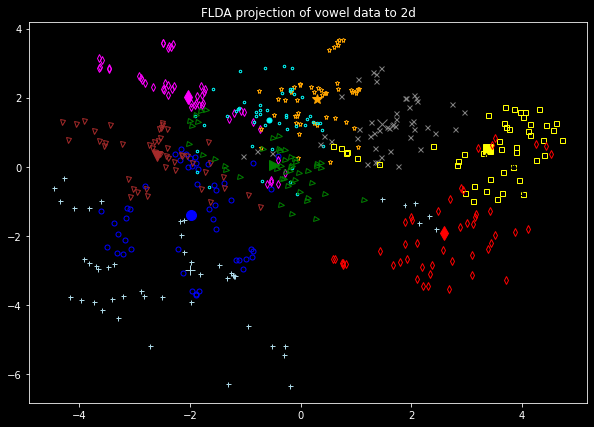

In [13]:
# FisherFDA projection
# See, The Elements of Statistical Learning 2E, Hastie et al. (2009) Figure 4.4
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=K)
X_lda = lda.fit_transform(X, y)
muC2d_lda = lda.transform(muC)

_, ax = plt.subplots(figsize=(10,7))
for c in range(nclasses):
    ndx = np.where(y == (c + 1))
    ax.plot(X_lda[ndx, 0], X_lda[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none')
    ax.plot(muC2d_lda[c, 0], muC2d_lda[c, 1], symbols[c], color=colors[c], markersize=10)
ax.set_title('FLDA projection of vowel data to 2d')